## 1. Import Necessary libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold,cross_val_score

from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

## 2. Import Dataset

In [2]:
fraud = pd.read_csv('Fraud_check.csv')

In [3]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## 3. Data Understanding

In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
fraud.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


## 4. Data Preparation

#### using label encoding for data usability

In [8]:
label_encoder = LabelEncoder()
fraud['Undergrad']= label_encoder.fit_transform(fraud['Undergrad'])
fraud['Urban']= label_encoder.fit_transform(fraud['Urban'])
fraud['Marital.Status']= label_encoder.fit_transform(fraud['Marital.Status'])

In [9]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [10]:
fraud['Status'] = fraud['Taxable.Income'].apply(lambda Income: 'Risky' if Income <= 30000 else 'Good')


In [11]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [12]:
fraud['Status'].value_counts()


Good     476
Risky    124
Name: Status, dtype: int64

In [13]:
fraud['Status']= label_encoder.fit_transform(fraud['Status'])


In [14]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


## 5. Model Building

In [15]:
x=fraud.iloc[:,0:4]
y=fraud['Status']

### MODEL VALIDATION TECHNIQUES

####  Train - Test Split

In [16]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)  

## 6. Model Training

In [17]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

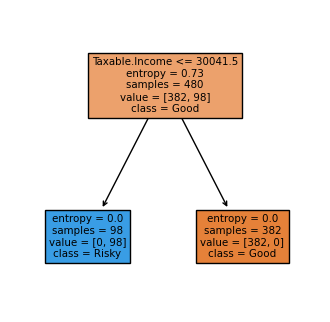

In [18]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population']
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=100)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [19]:
model.score(x_train,y_train)

1.0

In [20]:
model.score(x_test,y_test)

1.0

## HYPERPARAMETER TUNING

In [30]:
params = {
    'max_depth': [2, 3, 4, 5, 8, 10,12,15],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],
    'max_features':["sqrt","auto","log2", 0.2, None]
}
grid_search = GridSearchCV(estimator=model,param_grid=params,cv=10)


In [31]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 8, 10, 12, 15],
                         'max_features': ['sqrt', 'auto', 'log2', 0.2, None],
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

In [32]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'min_samples_leaf': 5}

### CART method using gini criteria

In [33]:
model1 = DecisionTreeClassifier(criterion = 'gini',max_depth=2,min_samples_leaf=5)
model1.fit(x_train,y_train) 

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)

In [34]:
model1.score(x_train,y_train)

1.0

In [35]:
model1.score(x_test,y_test)

1.0

In [36]:
confusion_matrix(y_pred=preds,y_true=y_test)

array([[94,  0],
       [ 0, 26]], dtype=int64)

In [37]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



# Decision tree is giving overfiting result we can try ensemble tecnique or random forest

In [38]:
b_model = BaggingClassifier(base_estimator=model1)

In [39]:
b_model.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                        min_samples_leaf=5))

In [40]:
b_model.score(x_train,y_train)

0.9979166666666667

In [41]:
b_model.score(x_test,y_test)

0.9916666666666667

0.9948979591836735


Text(0, 0.5, 'True Positive Rate')

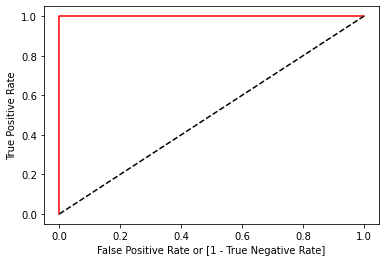

In [51]:
y_pred_train = b_model.predict(x_train)
fpr, tpr, thresholds = roc_curve(y_train,b_model.predict_proba (x_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

## Kfold cross-val score

In [46]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=123)
cvscore = cross_val_score(estimator=b_model, X=x_train, y=y_train, cv=k_fold)

In [47]:
cvscore

array([1.        , 0.97916667, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.97916667])

In [48]:
cvscore.mean(),cvscore.std()

(0.9958333333333332, 0.008333333333333349)

# Bagging classifier is giving better result 